In [1]:
import matplotlib.pyplot as plt
import numpy as np

from load_data import unpickle

In [2]:
plt.style.use("ggplot")

In [3]:
def array_to_image(array):
    """Convert a 1d array back into the array representation 
    of an image that can be shown using plt.imshow(). Based 
    on https://stackoverflow.com/questions/58778364
    
    Args: 
        array (ndarray): 
            1D numpy array of the original image
        
    Returns:
        image (ndarray):
            numpy array representing a 32x32 pixel image with 3 channels 
    """
    
    image = array.reshape(3, 32, 32)
    image = image.transpose(1, 2, 0)
    return image

def display_image(image, axis):
    """Display an image on a given axis without xtick or ytick labels
    
    Args:
        image (ndarray):
            array representing a 32x32 pixel image with 3 channels
        axis (matplotlib subplot axis): 
            axis for which the image is to be plotted on
            
    Returns:
        None
    """
    
    axis.imshow(image)
    axis.set_xticks([])
    axis.set_yticks([])

In [4]:
data = unpickle("data/data_batch_1")
keys = data.keys()
labels, label_counts = np.unique(data[b'labels'], return_counts=True)
number_labels = len(labels)

classes = [
    "airplane", "automobile", "bird", "cat", "deer", 
    "dog", "frog", "horse", "ship", "truck"
]

print("Keys:", keys)
print("\nLabel, Class, Count:")
for i in range(number_labels):
    print("{0}, {1}, {2}".format(labels[i], classes[i], label_counts[i]))
print("\nRows, Columns:", data[b'data'].shape)

Keys: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

Label, Class, Count:
0, airplane, 1005
1, automobile, 974
2, bird, 1032
3, cat, 1016
4, deer, 999
5, dog, 937
6, frog, 1030
7, horse, 1001
8, ship, 1025
9, truck, 981

Rows, Columns: (10000, 3072)


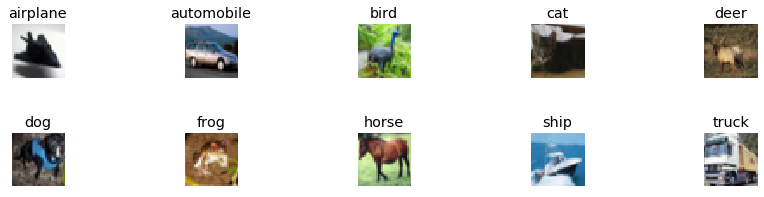

In [5]:
X, y = data[b'data'], np.array(data[b'labels'])
example_indices = np.unique(y, return_index=True)[1]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 3))
axes = axes.flatten()

for i, j in zip(example_indices, range(number_labels)):
    image = array_to_image(X[i])
    axes[j].set_title(classes[y[i]])
    display_image(image, axes[j])

plt.subplots_adjust(hspace=1)
plt.show()